# COMP24111 - Exercise 3: _Face recognition_

## 1. Task description

You will work on a face recognition task. The provided dataset includes face images of 40 subjects. There are a total of 400 images, with 10 images per subject. Each image contains 32×32=1024 pixels, with 256 grey levels per pixel.

## 2. Preparation

### Setting up

The functions that you need are defined in the source file we have provided you with. To use them you must import it first:

In [39]:
from lab3lib import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces

Now you can load the data:

In [40]:
data, labels = load_data()
print (data[0,:])
print ('\n', labels)

[ 75 101 128 ... 118  37  39]

 [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27
 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29
 29 29 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32
 32 32 32 32 32 32 

### Visualising the dataset

You can observe the faces stored in a data matrix by using the functions `show_single_face()` and `show_faces()`.

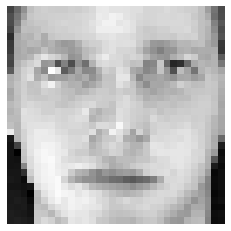

In [41]:
# Display a single example.
show_single_face(data[0, :])

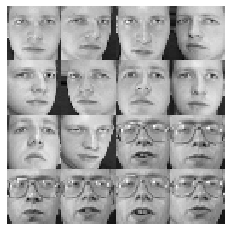

In [42]:
# Display the first 16 examples in a 4x4 grid.
show_faces(data[:16, :], num_per_row=4)

### Splitting into train and test set

A data partition function is supplied to facilitate your experiments. It randomly splits the provided data into the training and test sets, where the training set contains $N$ samples per class and the test set contains
the remaining samples. It takes the labels and the specified number $N$ as the input. It returns the sample indices in the training and test set. For example, the following code divides a given set of 400 samples into a training set containing 3 samples per subject and a test set containing 7 samples per subject:

In [43]:
tr_ind, te_ind = partition_data(labels, num_per_class=3)
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]
te_data = data[te_ind, :]
te_label = labels[te_ind]

## 3. $L_2$-regularised least squares implementation

Now, you will need to implement the function `l2_rls_train` below. It should train a linear model by minimising the $L_2$-regularised sum of squares loss using the normal equations (this is called $L_2$*-regularised least squares model*, or *ridge regression model*). It should support both single-output and multi-output cases. This function should take a set of training samples and a user-specified regularisation parameter $\lambda$ as the input, and return the predicted weights.

In [44]:
import numpy as np
def l2_rls_train(tr_data, tr_labels, reg_parameter # Add any other arguments here
                ):
    """
    A summary of your function goes here.

    data:   tr_data is a matrix with dimensions (120,1024) corresponding to the pixel grey level values of 120 images 
            used for training
    labels: tr_labels is an array of 120 labels (3 samples per person, 40 persons) specifying the actual class of subjects
            tr_labels[i] = the class of the person with index = tr_ind[i]

    Returns: an array w of dimensions (1025,1) containing the optimal weights resulting after setting the gradient 
             vector to 0 and solving the corresponding equation of optimality
    """   
    # This is just to be consistent with the lecture notes.
    X, y = tr_data, tr_labels
    
    # Expand X with a column of ones.
    X_tilde = np.column_stack((np.ones(X.shape[0]), X)) #dimensions (120,1025)
    
    # Compute the coefficient vector.
    if(reg_parameter):
        inv = np.linalg.inv( np.dot(np.transpose(X_tilde),X_tilde) + reg_parameter*np.identity(X_tilde.shape[1]) ) 
        w = np.dot( np.dot( inv, np.transpose(X_tilde) ) , y) #dimensions (1025,1)
    else:
        pseudo_inverse = np.linalg.pinv(X_tilde) 
        w = np.dot(pseudo_inverse,y)
    # Return model parameters.
    return w

Once you have trained your model, you can use it on to predict new data. Implement the following function to do this.

In [45]:
def l2_rls_predict(w, data # Add any other arguments here
                  ):
    """
    A summary of your function goes here.
    w : a matrix of dimensions (1025,1) containing the optimal weights
    data: matrix corresponding to the pixel grey level values of images
          dimensions are of the form (N,1024)

    Returns: a matrix containing the predicted data based on the input features and the precalculated optimal weights
    """
    
    # This is just to be consistent with the lecture notes.
    X = data #dimensions (N,1024)
    X_tilde = np.column_stack((np.ones(X.shape[0]), X)) #dimensions (N,1025)
    
    predicted_y = np.dot(X_tilde,w) #dimensions (N,1)   
    return predicted_y

## 4. Experiments

Start to use your functions `l2_rls_train` and `l2_rls_predict` to perform the following experiments.

### Experiment 1: Binary Classification

Start with a binary classification task to classify face images for subjects “1” and “30”.

Train three classifiers:
1. Set $y=-1$ for samples from “1” and $y=+1$ for samples from “30” to train a linear model, and use the threshold $T= 0$ to obtain the class prediction.
2. Set $y=0$ for samples from “1” and $y=1$ for samples from “30” to train a linear model, and use the threshold $T= 0.5$ to obtain the class prediction.
2. Set $y=1$ for samples from “1” and $y=30$ for samples from “30” to train a linear model, and use the threshold $T= 15.5$ to obtain the class prediction.

Randomly select 3 images per subject for training, and use the remaining images for testing. Train your classifier 1 and test it with a fixed regularisation parameter $\lambda$=0. Repeat this process 50 times and record the training and test errors.

In [46]:
import random
def exp1(label_class_1, label_class_30,threshold):
    # Map the labels and partition the data
    
    class1_indices = []
    class1_testing_set = set() #create empty set
    for i in range(10):
        class1_indices.append(i) #0,1,2,..9
        class1_testing_set.add(i)
        
    class30_indices = []
    class30_testing_set = set()
    for i in range(290,300):
        class30_indices.append(i) #290,291...299
        class30_testing_set.add(i)
    
    class1_training_set = set()
    while len(class1_training_set)<3:
        element = random.choice(tuple(class1_testing_set))
        class1_training_set.add(element) #add 3 random elements from class 1
        class1_testing_set.remove(element) #remove 3 elements from class1_testing_set 
        
    class30_training_set = set()
    while len(class30_training_set)<3:
        element = random.choice(tuple(class30_testing_set))
        class30_training_set.add(element) #add 3 random elements from class 1
        class30_testing_set.remove(element) #remove 3 elements from class1_testing_set    
    
    training_set_ind = class1_training_set.union(class30_training_set)
    testing_set_ind = class1_testing_set.union(class30_testing_set)
    
    tr_ind = list(training_set_ind) 
    te_ind = list(testing_set_ind) #finally get the desired indices from class 1 and class 30

    tr_labels = []
    for i in range(len(tr_ind)): #here len is 6 : 3 samples from class 1, 3 samples from class 30 used for training
        if (tr_ind[i]>=0) and (tr_ind[i]<10):
            tr_labels.append(label_class_1)  #set y=label_class_1 for training step
        else:
            tr_labels.append(label_class_30) #set y=label_class_30 for training step
            
    te_labels = []
    for i in range(len(te_ind)): #here len is 14 : 7 samples from class1, 7 samples from class 30 used for training
        if (te_ind[i]>=0) and (te_ind[i]<10):
            te_labels.append(label_class_1)
        else:
            te_labels.append(label_class_30)
    
    tr_data = data[tr_ind, :]
    te_data = data[te_ind, :] #select corresponding data 
    
    # Train your model
    w = l2_rls_train(tr_data, tr_labels, 0)
    
    # Define the threshold
    T = threshold
    
    # Perform prediction for training and compute the training error
    predicted_y = l2_rls_predict(w, tr_data)
    
    tr_error=0
    tr_accuracy=0
    for i in range(predicted_y.shape[0]):
        if predicted_y[i] >= T: #prediction says sample is from class 30
            if tr_labels[i] == label_class_30:
                tr_accuracy+=1
                
            else:
                tr_error+=1
        else: #prediction says sample is from class 1
            if tr_labels[i] == label_class_1:
                tr_accuracy+=1
            else:
                tr_error+=1
                 
    tr_err = tr_error*100/(tr_error + tr_accuracy)
    
    # Perform prediction for testing and compute the test error
    predicted_y = l2_rls_predict(w, te_data)
    
    te_error=0
    te_accuracy=0
    guesses_30=0
    guesses_1=0
    for i in range(predicted_y.shape[0]):
        if predicted_y[i] >= T: #prediction says sample is from class 30
            if te_labels[i] == label_class_30: #if sample is indeed from class 30
                te_accuracy+=1 #increment testing accuracy
                guesses_30+=1
            elif te_labels[i] == label_class_1:
                te_error+=1 #increment testing error
        else: #prediction says sample is from class 1
            if te_labels[i] == label_class_1: #if sample is indeed from class 1
                te_accuracy+=1
                guesses_1+=1
            elif te_labels[i] == label_class_30:
                te_error+=1
    
    print("Class 30 correct guesses: "+str(guesses_30))
    print("Class 1 correct guesses: "+str(guesses_1))
    te_err = te_error*100/(te_error + te_accuracy)
    
    return tr_err, te_err

In [47]:
# Use the `exp1()` function to experiment with classifier 1.
# Your code goes here.
import statistics as stats
avg1 = []
avg2 = []
avg1.append(0)
avg2.append(0)

test_error = []
std = []
for k in range(50): 
    ans=exp1(-1,1,0)
    print ("Training, testing error for classifier 2 is: " + str(ans))
    arr = np.array(ans);
    avg1[0]+=arr[0]
    avg2[0]+=arr[1]
    test_error.append(arr[1])
avg1[0]/=50
avg2[0]/=50    
print("Average: (" + str(avg1[0]) + ", "+str(avg2[0])+ ")")

std.append(stats.stdev(test_error))

Class 30 correct guesses: 7
Class 1 correct guesses: 6
Training, testing error for classifier 2 is: (0.0, 7.142857142857143)
Class 30 correct guesses: 7
Class 1 correct guesses: 6
Training, testing error for classifier 2 is: (0.0, 7.142857142857143)
Class 30 correct guesses: 7
Class 1 correct guesses: 6
Training, testing error for classifier 2 is: (0.0, 7.142857142857143)
Class 30 correct guesses: 7
Class 1 correct guesses: 4
Training, testing error for classifier 2 is: (0.0, 21.428571428571427)
Class 30 correct guesses: 7
Class 1 correct guesses: 7
Training, testing error for classifier 2 is: (0.0, 0.0)
Class 30 correct guesses: 7
Class 1 correct guesses: 4
Training, testing error for classifier 2 is: (0.0, 21.428571428571427)
Class 30 correct guesses: 7
Class 1 correct guesses: 5
Training, testing error for classifier 2 is: (0.0, 14.285714285714286)
Class 30 correct guesses: 7
Class 1 correct guesses: 7
Training, testing error for classifier 2 is: (0.0, 0.0)
Class 30 correct guesses:

Repeat the same experiment for classifier 2.

In [48]:
# Use the `exp1()` function to experiment with classifier 2.
# Your code goes here.
avg1.append(0)
avg2.append(0)
test_error = []
for k in range(50): 
    ans=exp1(0,1,0.5)
    print ("Training, testing error for classifier 2 is: " + str(ans))
    arr = np.array(ans);
    avg1[1]+=arr[0]
    avg2[1]+=arr[1]
    test_error.append(arr[1])    
avg1[1]/=50
avg2[1]/=50
print("Average: (" + str(avg1[1]) + ", "+str(avg2[1])+ ")")

std.append(stats.stdev(test_error))

Class 30 correct guesses: 7
Class 1 correct guesses: 7
Training, testing error for classifier 2 is: (0.0, 0.0)
Class 30 correct guesses: 7
Class 1 correct guesses: 7
Training, testing error for classifier 2 is: (0.0, 0.0)
Class 30 correct guesses: 7
Class 1 correct guesses: 7
Training, testing error for classifier 2 is: (0.0, 0.0)
Class 30 correct guesses: 7
Class 1 correct guesses: 7
Training, testing error for classifier 2 is: (0.0, 0.0)
Class 30 correct guesses: 7
Class 1 correct guesses: 4
Training, testing error for classifier 2 is: (0.0, 21.428571428571427)
Class 30 correct guesses: 7
Class 1 correct guesses: 7
Training, testing error for classifier 2 is: (0.0, 0.0)
Class 30 correct guesses: 7
Class 1 correct guesses: 7
Training, testing error for classifier 2 is: (0.0, 0.0)
Class 30 correct guesses: 7
Class 1 correct guesses: 4
Training, testing error for classifier 2 is: (0.0, 21.428571428571427)
Class 30 correct guesses: 7
Class 1 correct guesses: 7
Training, testing error for

Repeat the same experiment for classifier 3.

In [49]:
# Use the `exp1()` function to experiment with classifier 3.
# Your code goes here.
avg1.append(0)
avg2.append(0)
test_error = []
for k in range(50):
    ans=exp1(1,30,15.5)
    print ("Training, testing error for classifier 3 is: " + str(ans))
    arr = np.array(ans);
    avg1[2]+=arr[0]
    avg2[2]+=arr[1]
    test_error.append(arr[1])
avg1[2]/=50
avg2[2]/=50
print("Average: (" + str(avg1[2]) + ", "+str(avg2[2])+ ")")

std.append(stats.stdev(test_error))

Class 30 correct guesses: 7
Class 1 correct guesses: 5
Training, testing error for classifier 3 is: (0.0, 14.285714285714286)
Class 30 correct guesses: 7
Class 1 correct guesses: 4
Training, testing error for classifier 3 is: (0.0, 21.428571428571427)
Class 30 correct guesses: 7
Class 1 correct guesses: 4
Training, testing error for classifier 3 is: (0.0, 21.428571428571427)
Class 30 correct guesses: 7
Class 1 correct guesses: 4
Training, testing error for classifier 3 is: (0.0, 21.428571428571427)
Class 30 correct guesses: 7
Class 1 correct guesses: 6
Training, testing error for classifier 3 is: (0.0, 7.142857142857143)
Class 30 correct guesses: 7
Class 1 correct guesses: 6
Training, testing error for classifier 3 is: (0.0, 7.142857142857143)
Class 30 correct guesses: 7
Class 1 correct guesses: 6
Training, testing error for classifier 3 is: (0.0, 7.142857142857143)
Class 30 correct guesses: 7
Class 1 correct guesses: 6
Training, testing error for classifier 3 is: (0.0, 7.1428571428571

Print the test error mean and standard deviation of the three classifiers and display them in the same plot.

Test error mean of classifier 1 is: 7.142857142857146
Standard deviation of classifier 1 is: 7.636035483212125

Test error mean of classifier 2 is: 6.857142857142858
Standard deviation of classifier 2 is: 8.891028943180393

Test error mean of classifier 3 is: 7.285714285714286
Standard deviation of classifier 3 is: 8.474918282794333



E:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


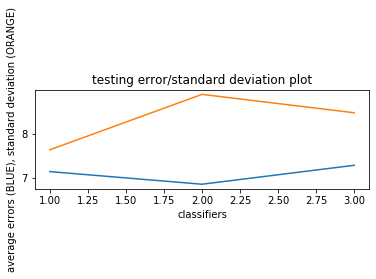

In [50]:
# Your code goes here
for i in range(3):
    print("Test error mean of classifier " +str(i+1)+" is: "+str(avg2[i]))
    print("Standard deviation of classifier "+str(i+1)+" is: "+str(std[i])+"\n")
    
from matplotlib import pyplot as plt

x = np.arange(1,4)
y = avg2

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(x,y)

y = std
ax2 = fig.add_subplot(2,1,1)
ax2.plot(x,y)


plt.xlabel('classifiers')
plt.ylabel('average errors (BLUE), standard deviation (ORANGE)')
plt.title('testing error/standard deviation plot')

plt.show() 



Compare the three classifiers and comment on your results.

What training accuracies do you obtain with your linear classifier? Explain the reason.

Between subjects “1” and “30”, which one is more difficult for the linear classifier to recognise? Explain it.

### Experiment 2: Multi-class Classification

Now, proceed to the multi-class classification task to classify face images for all the 40 subjects. Decide an appropriate way to set your target output and make class prediction. 

Split your data to two sets: the training set contains 5 randomly selected images per subject and the test set contains the remaining images. The training set is used to train the model and select hyper-parameter $\lambda$, while the test set is only for final assessment of the trained classifier with the selected $\lambda$. 

Design an appropriate and complete machine learning experiment, which should include the training, hyper-parameter selection and evaluation stages. You can choose from the random subsampling, $k$-fold CV and LOO approaches for hyper-parameter selection. 

Write your code below and make sure it compiles. Show your code to the TA, explain your classifier and experiment design.

In [51]:
def hyperparameter_selection(number_a, number_b):
    """
    Finds the best value for lambda using some method of hyperparameter selection.
    Given a an image and an output i,
    number_a specifies that the image is not from class i
    number_b specifies that the image is from class i
    """
    # Your code goes here
    tr_ind, te_ind = partition_data(labels, num_per_class=5)
    
    #training
    tr_data = data[tr_ind, :] #dimensions (200,1025)
    #print("training labels:")
    #print(labels[tr_ind]) #After printing this I observed the labels are grouped together, so they need to be shuffled first
    tr_labels = number_a*np.ones((200,40))
    for i in range(200):
        tr_labels[i][labels[tr_ind[i]] -1 ] = number_b  #have to substract 1 from labels, as they are from 1 to 40
        
    perm = np.random.permutation(200) #first,create a permutation of the indices from 1 to 200
    copy_tr_data = tr_data #create a copy of tr_data
    copy_tr_labels = tr_labels #create a copy of tr_labels
    #shuffle
    tr_data = copy_tr_data[perm]
    tr_labels = copy_tr_labels[perm]
    
    #testing
    te_data = data[te_ind, :]
    te_labels = number_a*np.ones((200,40))
    for i in range(200):
        te_labels[i][labels[te_ind[i]] -1 ] = number_b  #have to substract 1 from labels, as they are from 1 to 40
    
    #Train the model by varying the hyperparameter and doing a 4 cross fold validation for each lamdba     
    mn=1000
    for hp in np.arange(-1,6,0.5):  #min power=1, max power=6, step=0.5
        average_error=0
        for step in range(4):   #do a 4 cross fold validaton using data given by tr_data
            te_data_after_partition = tr_data[step*50:(step+1)*50,:]
            te_labels_after_partition = tr_labels[ step*50:(step+1)*50 , :] 
            if(step>0 and step<3):
                tr_data_after_partition = np.concatenate((tr_data[0:step*50,:] , tr_data[(step+1)*50:200,:]),axis=0)                            
                tr_labels_after_partition = np.concatenate( (tr_labels[0:step*50, : ], tr_labels[(step+1)*50:200, : ] ),axis=0)                           
            elif step==0:
                tr_data_after_partition = tr_data[50:200,:]
                tr_labels_after_partition = tr_labels[50:200,:]
            else:
                tr_data_after_partition = tr_data[0:150,:]
                tr_labels_after_partition = tr_labels[0:150,:]
            
            
            w = l2_rls_train(tr_data_after_partition,tr_labels_after_partition,np.power(10.0,hp))
            #Compute the optimal weights vector      
            
            predicted_y = l2_rls_predict(w, te_data_after_partition) # Perform prediction for training
            #predicted_y has dimensions (50,40)  
            te_error=0
            for index in range(predicted_y.shape[0]): #50
                cls=np.argmax(predicted_y[index])+1 #image with index = 'index' is predicted to belong to class cls
                #print("Image with index "+str(index)+" is predicted to belong to class "+str(cls))
                #print("Actual class of image is: "+str(np.argmax(te_labels_after_partition[index])+1))
                if (np.argmax(te_labels_after_partition[index])+1) !=cls:
                    te_error+=1

            average_error+=te_error        
        if average_error/2 < mn:
            print("lambda updated")
            mn=average_error/2
            best_lambda=np.power(10.0,hp)    
        #print("Average test error is: "+str(average_error/2)+" %")    
    
    #Final Assessment of te_data
    w = l2_rls_train(tr_data,tr_labels,best_lambda)
    #Compute the optimal weights vector      
            
    predicted_y = l2_rls_predict(w, te_data) # Perform prediction for training
    #predicted_y has dimensions (200,40)  
    te_error=0
    for index in range(predicted_y.shape[0]):
        cls=np.argmax(predicted_y[index])+1 #image with index = 'index' is predicted to belong to class cls  
        if (np.argmax(te_labels[index])+1) != cls:
            te_error+=1
    
    print("\nFinal assessment of the trained classifier:")
    print("For lambda = "+str(best_lambda)+" , testing error is: "+str(te_error*100/(200-te_error))+"\n")
    
    return best_lambda

lambda updated
lambda updated
lambda updated
lambda updated

Final assessment of the trained classifier:
For lambda = 100000.0 , testing error is: 8.695652173913043


Image with index 6 is the most difficult to be recognised by the classifier:


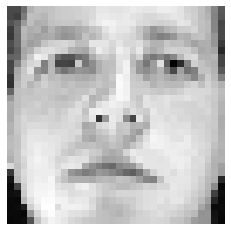

In [52]:
# Your code goes here
l = hyperparameter_selection(-1,1)

#This piece of code is to find out what the most difficult to be recognised image is
tr_ind, te_ind = partition_data(labels, num_per_class=5)
tr_data = data[tr_ind, :]
te_data = data[te_ind, :]

tr_label = (-1)*np.ones((200,40))
for i in range(200):
    tr_label[i][labels[tr_ind[i]] -1 ] = 1  #have to substract 1 from labels, as they are from 1 to 40

te_labels = (-1)*np.ones((200,40))
for i in range(200):
    te_labels[i][labels[te_ind[i]] -1 ] = 1  #have to substract 1 from labels, as they are from 1 to 40    
    
errors = np.zeros(200)
for num  in range(10):   
    perm = np.random.permutation(200) #first,create a permutation of the indices from 1 to 200
    copy_tr_data = tr_data #create a copy of tr_data
    copy_tr_labels = tr_label #create a copy of tr_labels
    
    #shuffle
    tr_data = copy_tr_data[perm]
    tr_labels = copy_tr_labels[perm]
    
    w = l2_rls_train(tr_data,tr_label,l) #Compute the optimal weights vector     
    predicted_y = l2_rls_predict(w, te_data) # Perform prediction for training
    
    for image_index in range(200):
        errors[image_index]+= (np.argmax(predicted_y[image_index]) != np.argmax(te_labels[image_index]))

j = np.argmax(errors)
print("\nImage with index "+str(te_ind[j])+" is the most difficult to be recognised by the classifier:")
show_single_face(data[te_ind[j],:]) #most difficult to be recognised

Analyse the classification results, and pick some subjects that are considered the most difficult to recognise by your classifier. Show and explain it to the TA.

### Experiment 3: Face Completion

Revise the “Regression Example II” on face completion in Chapter 2. The task is to guess the 512 pixels of the right face from the 512 pixels of the left face. 

The following command can be used to extract the left and right faces from the input data.

In [53]:
left, right = split_left_right(data)

tr_ind, te_ind = partition_data(labels, num_per_class=5)
tr_data = left[tr_ind, :]
tr_label = labels[tr_ind]
te_data = left[te_ind, :]
te_label = labels[te_ind]

And you can visualise them with the function `show_split_faces()`:

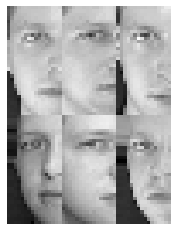

In [54]:
show_split_faces(left[:6, :], num_per_row=3)

Build a face completion model using your functions `l2_rls_train` and `l2_rls_predict`. Design an experiment to assess your model, which should include appropriate training and testing. Use mean absolute percentage error to evaluate the regression performance. You do not need to bother with hyper-parameter selection, but simply set $\lambda$=0.

Write your code below and make sure it compiles. Show your code to the TA, explain your model and experiment design, and demonstrate results.

In [55]:
# Your code goes here
w = l2_rls_train(tr_data,right[tr_ind,:],0)
print(tr_data.shape)
print(right[tr_ind,:].shape)
print(w.shape)
print(te_data.shape)
predicted_y = l2_rls_predict(w,te_data)

(200, 512)
(200, 512)
(513, 512)
(200, 512)


Visualise and compare the ground truth face (include both the left and right parts) and the completed face (include both the true left and predicted right parts) for 3 randomly chosen testing samples below. You can use `join_left_right(left, right)` to concatenate the left and right halves of a set of faces.

(200, 512)
(200, 512)
Mean Absolute Percentage Error is: 23.040690211153144 %


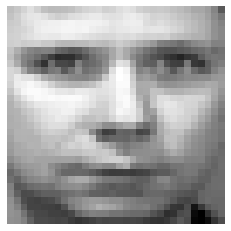

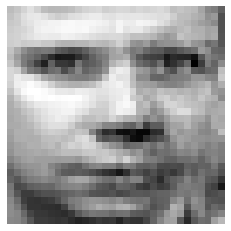

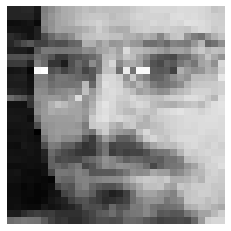

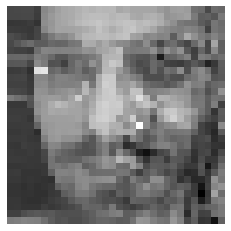

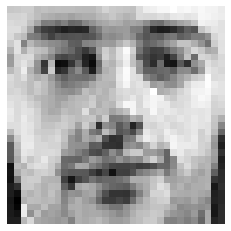

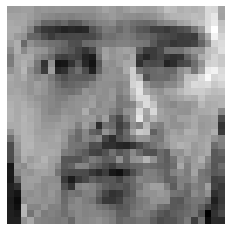

In [60]:
# Your code goes here
print(te_data.shape)
print(predicted_y.shape)
output = join_left_right(te_data,predicted_y)

first_index = random.randint(0,200)
second_index = random.randint(0,200)
third_index = random.randint(0,200)

y_true = right[te_ind,:]
MAPE = np.mean(np.abs((y_true - predicted_y) / y_true)) * 100 #compute Mean Absolute Percentage Error
print("Mean Absolute Percentage Error is: "+str(MAPE) +" %")

show_single_face(data[te_ind[first_index],:])
show_single_face(output[first_index,:])
show_single_face(data[te_ind[second_index],:])
show_single_face(output[second_index,:])
show_single_face(data[te_ind[third_index],:])
show_single_face(output[third_index,:])

Does your model work well? Comment on it.

## 5. Deliverables and Marking

By the deadline, you should submit one single Jupyter file using GitLab. Please find the coursework submission instruction from the following link: https://wiki.cs.manchester.ac.uk/index.php/UGHandbook19:Coursework .

This exercise is worth 15 marks – marks will be allocated roughly on the basis of: 
- rigorous experimentation,
- knowledge displayed when talking to the TA,
- problem solving skill,
- self-learning ability,
- how informative and well presented your graphs are,
- language and ease of reading.

You must be able to explain any code you've written in order to get full marks. During the marking session we will ask you to run all cells in your Jupyter file, so ensure that the file is runnable using the "Restart Kernel and Run All Cells" menu option.

The lab is marked out of 15:

|                          |         |
|:------------------------ |--------:|
| $L_2$-RLS Implementation | 3 marks |
| Experiment 1             | 4 marks |
| Experiment 2             | 4 marks |
| Experiment 3             | 4 marks |